<a href="https://colab.research.google.com/github/Shiva-kalyanaram/Cardeko-resale-price-Prediction-/blob/main/cardhekoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column', None)

In [3]:
df = pd.read_csv('/content/cleaned_car_dheko.csv')
df.head(2)

,location,ownerNo,oem,model,modelYear,centralVariantId,variantName,chance_sale_next_days,insurance_validity,Seats,transmission,RTO,Engine CC,color,Mileage_kmpl,Max_power,Torque_Nm,Top Speed Kmph,km,bt,ft,priceSaving,price_in_lakhs
0,bangalore,3,Maruti,Maruti Celerio,2015,3979,VXI,6,Third Party insurance,5,Manual,KA51,998,White,21.951608,74.416228,100,150,120000,Hatchback,Petrol,0.0,4.00
1,bangalore,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,6,Comprehensive,5,Manual,KA05,1497,White,17.674739,115.384675,156,195,32706,SUV,Petrol,0.0,8.11


In [4]:
df.isnull().sum()

location                 0
ownerNo                  0
oem                      0
model                    0
modelYear                0
centralVariantId         0
variantName              0
chance_sale_next_days    0
insurance_validity       0
Seats                    0
transmission             0
RTO                      6
Engine CC                0
color                    0
Mileage_kmpl             0
Max_power                0
Torque_Nm                0
Top Speed Kmph           0
km                       0
bt                       3
ft                       0
priceSaving              0
price_in_lakhs           0
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

**Lets starts with the location wise Total price.**

In [9]:
df.groupby('location')['price_in_lakhs'].sum().sort_values(ascending=False)

location
delhi        16378.53
chennai      13561.32
bangalore    13402.89
hyderabad    11169.80
kolkata       9980.00
jaipur        7119.70
Name: price_in_lakhs, dtype: float64

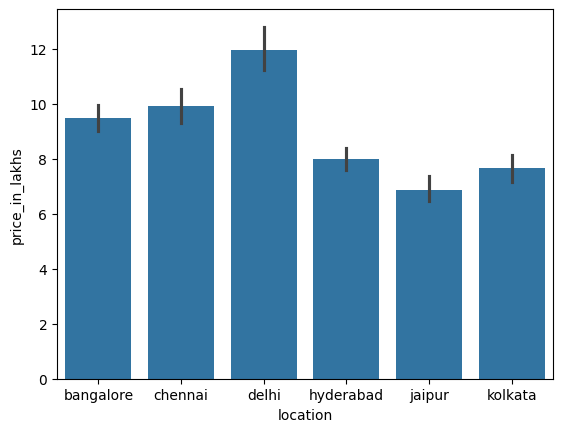

In [6]:
sns.barplot(x = 'location', y ='price_in_lakhs', data = df)
plt.show()

It seems Delhi, had high sales of price while comparing to other locations.





Lets see that Year wise total sales in price for re sale cars and Lets see the latest report of location wise car sales!! which is for the year 2023

---



In [6]:
df.min()

location                                 bangalore
ownerNo                                          0
oem                                           Audi
model                                   Ambassador
modelYear                                     1985
centralVariantId                                 5
variantName                                    1.0
chance_sale_next_days                            6
insurance_validity                               1
Seats                                            2
transmission                             Automatic
RTO                                           22BH
Engine CC                                       72
color                    Alabaster Silver Metallic
Mileage_kmpl                                  7.81
Max_power                                    36.25
Torque_Nm                                        9
Top Speed Kmph                                  80
km                                               0
bt                             

In [7]:
df.max()

location                                                kolkata
ownerNo                                                       5
oem                                                       Volvo
model                                                Volvo XC60
modelYear                                                  2023
centralVariantId                                          11098
variantName              xDrive30i M Sport Black Shadow edition
chance_sale_next_days                                         6
insurance_validity                                     Zero Dep
Seats                                                        10
transmission                                             Manual
RTO                                                        wb52
Engine CC                                                  5000
color                                             urban titanim
Mileage_kmpl                                              140.0
Max_power                               

In [39]:
location_23 = df[df['modelYear'] == 2023].groupby('location')['price_in_lakhs'].sum().sort_values(ascending=False)
total = df[df['modelYear'] == 2023].groupby('location')['price_in_lakhs'].sum().sort_values(ascending=False)
total

location
delhi        764.93
kolkata      348.94
chennai      219.94
jaipur       173.61
hyderabad     78.20
bangalore     40.18
Name: price_in_lakhs, dtype: float64

<ipython-input-42-0e21c60adcbc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=location_23.index, y=location_23, palette=colors)
<ipython-input-42-0e21c60adcbc>:4: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(x=location_23.index, y=location_23, palette=colors)


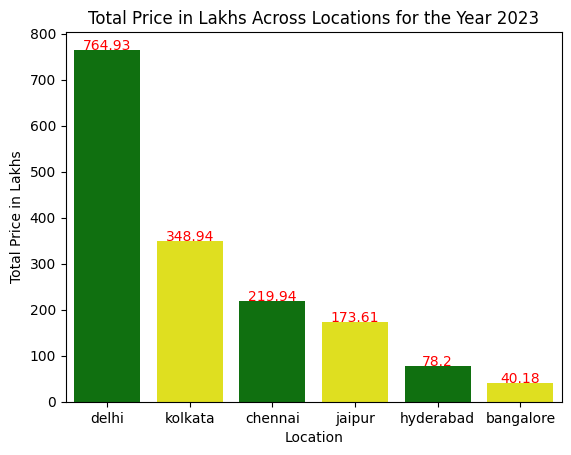

In [42]:
colors = ['green', 'yellow']

# Create the bar plot
bar = sns.barplot(x=location_23.index, y=location_23, palette=colors)

# Add annotations to the bars
for i, value in enumerate(location_23):
    bar.text(i, value + 0.25, str(round(value, 2)),
             fontdict=dict(color='red', fontsize=10, horizontalalignment='center'))

plt.xlabel('Location')
plt.ylabel('Total Price in Lakhs')
plt.title('Total Price in Lakhs Across Locations for the Year 2023')
plt.show()

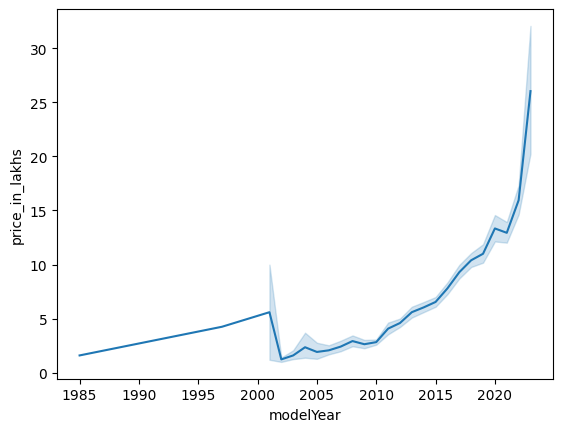

In [9]:
sns.lineplot(x = 'modelYear', y = 'price_in_lakhs', data = df)
plt.show()

There is was slight drop in selling resle cars from 2001 to 2015. But now for past 3 year it was in increase trend. Since there was a drop, lets which company cars were dropped in sales.

In [10]:
dropped_year_high_model = df[(df['modelYear'] >= 2001) & (df['modelYear'] <= 2010)].groupby('oem')['price_in_lakhs'].sum().sort_values(ascending=False)
total= dropped_year_high_model.sum()

In [11]:
dropped_year_high_model

oem
Hyundai             312.53
Maruti              284.22
Toyota              178.06
Honda               145.04
BMW                  87.75
Mercedes-Benz        78.14
Ford                 61.16
Mahindra             59.24
Skoda                52.99
Chevrolet            52.57
Volkswagen           43.61
Audi                 38.25
Tata                 23.58
Fiat                 21.75
Mitsubishi           13.29
Volvo                10.90
Mahindra Renault      5.35
Nissan                5.25
Name: price_in_lakhs, dtype: float64

<ipython-input-47-85f85b755cac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x = dropped_year_high_model.index, y = dropped_year_high_model, palette = colors)
<ipython-input-47-85f85b755cac>:3: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(x = dropped_year_high_model.index, y = dropped_year_high_model, palette = colors)


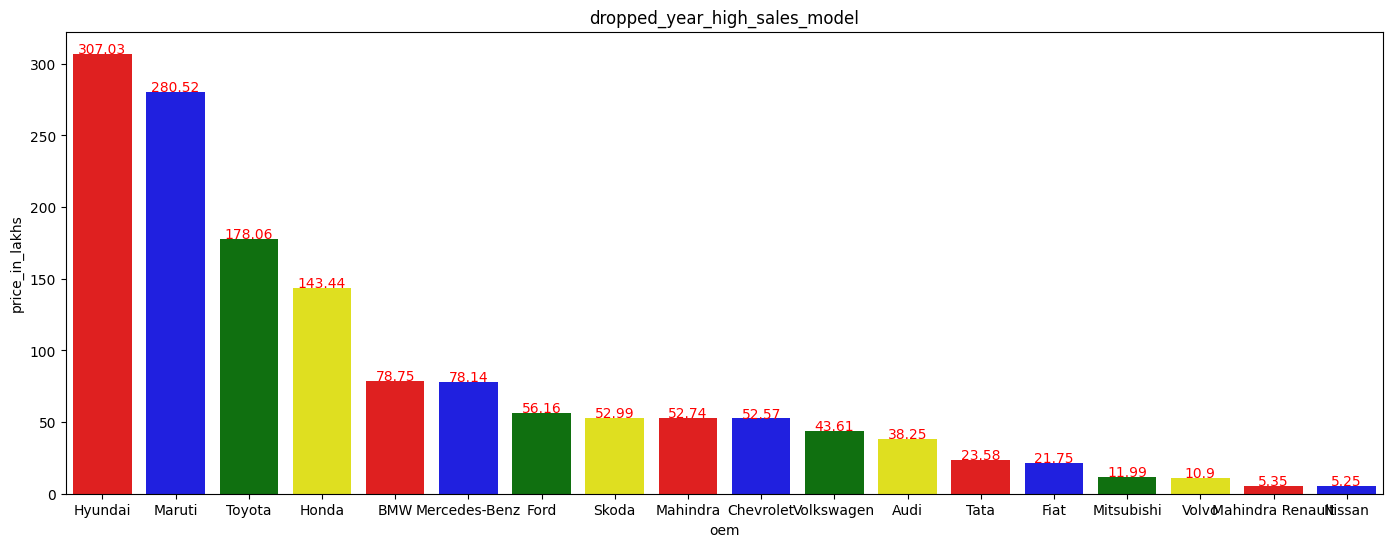

In [47]:
colors = ['red', 'blue', 'green', 'yellow']
plt.figure(figsize=(17,6))
bar = sns.barplot(x = dropped_year_high_model.index, y = dropped_year_high_model, palette = colors)
for i, value in enumerate(dropped_year_high_model):
  bar.text(i, value + 0.25, str(round(value, 2)),
           fontdict= dict(color='red', fontsize=10, horizontalalignment='center'))
plt.title('dropped_year_high_sales_model')
plt.show()

So, in the dropped years from 2002 to 2010, it seems Hyudai shows high sales even others shows drop in re-sale by this, we can understand that, Hyundai, Maruti, Toyata had high re-sale prices even in some low conditions.

----Also, we can see that Mahindra, Renault, Nissan had very low in dropped years while comparing to other models

Lets move to features on cars which affects the resale prices

Starts from car seats

In [48]:
df.head()

,location,ownerNo,oem,model,modelYear,centralVariantId,variantName,chance_sale_next_days,insurance_validity,Seats,transmission,RTO,Engine CC,color,Mileage_kmpl,Max_power,Torque_Nm,Top Speed Kmph,km,bt,ft,priceSaving,price_in_lakhs,percentage_change
2,bangalore,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,6,Comprehensive,5,Manual,KA03,1199,Red,19.156175,88.315440,118,150,11949,Hatchback,Petrol,0.0,5.85,-27.866831
4,bangalore,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,6,Third Party insurance,5,Manual,KA04,1248,Gray,24.269009,80.017408,193,190,60000,SUV,Diesel,0.0,7.90,97.500000
8,bangalore,1,Tata,Tata Tiago,2017,2985,1.2 Revotron XZ WO Alloy,6,Comprehensive,5,Manual,KA03,1199,Red,19.156175,88.315440,118,150,11949,Hatchback,Petrol,0.0,5.85,69.565217
9,bangalore,1,Maruti,Maruti Baleno,2018,3962,1.2 Delta,6,Third Party insurance,5,Manual,KA03,1197,Red,20.176266,83.710026,116,180,50000,Hatchback,Petrol,0.0,6.90,17.948718
11,bangalore,1,Honda,Honda Jazz,2018,6506,VX CVT,6,Comprehensive,5,Automatic,KA03,1199,Grey,19.156175,88.315440,118,172,23000,Hatchback,Petrol,0.0,8.25,19.565217


In [69]:
seats_wise = df.groupby('Seats')['price_in_lakhs'].mean().sort_values(ascending=False)
means = seats_wise.mean()

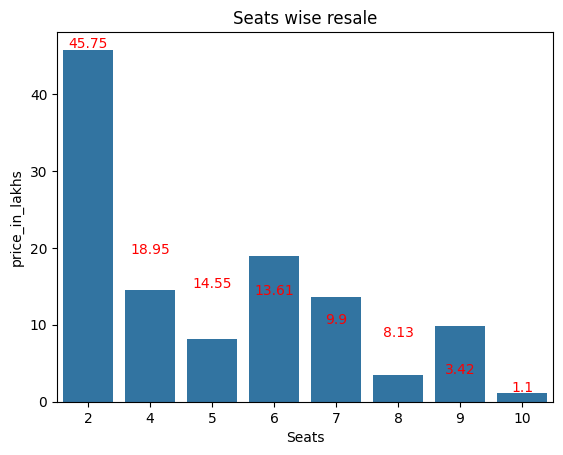

In [70]:
bar = sns.barplot(x=seats_wise.index, y = seats_wise)
for i, value in enumerate(seats_wise):
  bar.text(i, value + 0.25, str(round(value, 2)),
          fontdict = dict(color='red', fontsize=10, horizontalalignment='center'))
plt.title('Seats wise resale')
plt.show()

Overal two and 6 seater cars had good reasonalable resale price.

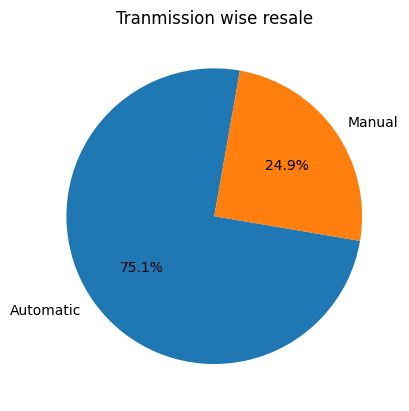

In [66]:
tranmission_wise = df.groupby('transmission')['price_in_lakhs'].mean().sort_values(ascending=False)

plt.pie(tranmission_wise, labels = tranmission_wise.index, autopct='%1.1f%%', startangle = 80)
plt.title('Tranmission wise resale')
plt.show()

Find that Automatic cars had high resale value of nearly 75% while comparing to Manual cars.

Lets see Milage wise manufacturer on re-sale price

In [76]:
top_5_mileage_wise_cars = df.groupby('oem')[['Mileage_kmpl', 'price_in_lakhs']].mean().sort_values(by='price_in_lakhs', ascending=False).reset_index().head(5)

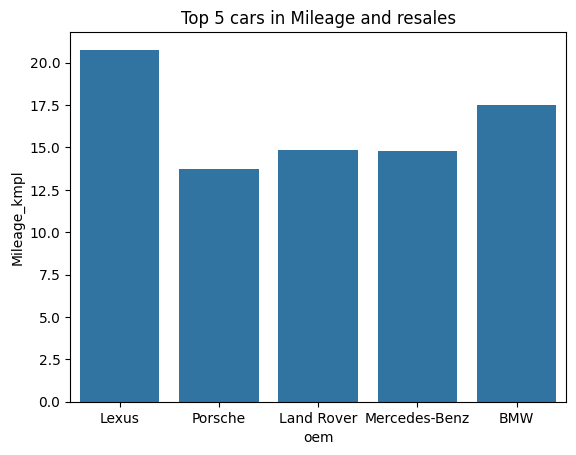

In [78]:
sns.barplot(x = 'oem', y = 'Mileage_kmpl', data= top_5_mileage_wise_cars)
plt.title('Top 5 cars in Mileage and resales')
plt.show()

from this, we can find that Lexus car had high Mileage and hence it avg resalve price is higer than others.

<ipython-input-88-223238a99e1b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='oem', y='Top Speed Kmph', data=top_speed_cars, palette=colors)


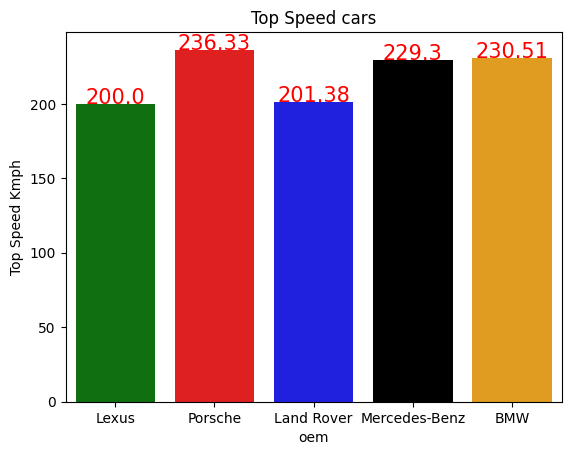

In [88]:

top_speed_cars = df.groupby('oem')[['Top Speed Kmph','price_in_lakhs']].mean().sort_values(by='price_in_lakhs', ascending=False).head(5)

colors = ['green', 'red', 'blue', 'black', 'orange']
bar = sns.barplot(x='oem', y='Top Speed Kmph', data=top_speed_cars, palette=colors)

for i, (index, row) in enumerate(top_speed_cars.iterrows()):
    bar.text(i, row['Top Speed Kmph'] + 0.25, str(round(row['Top Speed Kmph'], 2)),
             fontdict=dict(color='red', fontsize=15, horizontalalignment='center'))

plt.title('Top Speed cars')
plt.show()


In [89]:
df['ft'].value_counts()

Petrol      5175
Diesel      2589
Cng           87
Lpg           13
Electric       1
Name: ft, dtype: int64

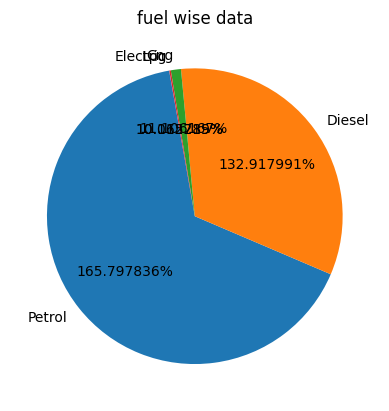

In [94]:
plt.pie(df['ft'].value_counts(), labels = df['ft'].value_counts().index, autopct= '1%1f%%', startangle=100)
plt.title('fuel wise data')
plt.show()

In [95]:
df.groupby('ft')['price_in_lakhs'].mean().sort_values(ascending=False)

ft
Diesel      13.138138
Petrol       7.136481
Cng          4.889080
Electric     4.600000
Lpg          2.257692
Name: price_in_lakhs, dtype: float64

In [103]:
df.groupby(['oem', 'ft'])[['ft', 'price_in_lakhs']].mean().sort_values(by = 'price_in_lakhs', ascending=False).head().reset_index

<ipython-input-103-3ae2be9d123f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['oem', 'ft'])[['ft', 'price_in_lakhs']].mean().sort_values(by = 'price_in_lakhs', ascending=False).head().reset_index


<bound method DataFrame.reset_index of                    price_in_lakhs
oem        ft                    
Porsche    Diesel       53.000000
Land Rover Petrol       51.180000
Lexus      Petrol       49.875000
Volvo      Petrol       49.772222
BMW        Petrol       49.122581>

By this we can find, porsche with fuel type (Diesel) had high re-sale prices


otherthan that, the manjority are for petrol fuel types. So, we can conclude that, Petrol cars had high resale Prices while comparing to diesel.

In detail, petrol cars in manufactuere of Land Rover, Lexus, Volvo, BMW were high resale in all kind of factors we have seen.

These cars are good in top speed and good mileage hence, its resale prices was always high.